# Exploratory Data Analysis: Univariate Analysis

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Which subject performed best during the 2017 ACT test?

### b) Defining the Metric for Success

### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [2]:
# Loading the Data from the source 
# ---
# Dataset url = http://bit.ly/2017ACTScoresDataset
# ---
#

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt


data1 = pd.read_csv("http://bit.ly/2017ACTScoresDataset")
data1.head(5)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


## 3. Checking the Data

In [3]:
# Determining the no. of records in our dataset
#

len(data1.index)

#procedure 2 

data1.shape[0]

#procedure 3

data1[data1.columns[0]].count()

52

In [4]:
# Previewing the top of our dataset
#

data1.head(5)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [5]:
# Previewing the bottom of our dataset
# 

data1.tail(5)

,State,Participation,English,Math,Reading,Science,Composite
47,Virginia,29%,23.5,23.3,24.6,23.5,23.8
48,Washington,29%,20.9,21.9,22.1,22.0,21.9
49,West Virginia,69%,20.0,19.4,21.2,20.5,20.4
50,Wisconsin,100%,19.7,20.4,20.6,20.9,20.5
51,Wyoming,100%,19.4,19.8,20.8,20.6,20.2x


In [12]:
# Checking whether each column has an appropriate datatype
#
#removing x from the values that have it

data1['Composite']=data1['Composite'].str.replace('x','')
data1['Composite'] = data1['Composite'].astype(float, errors = 'raise')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     float64
dtypes: float64(5), object(2)
memory usage: 3.0+ KB


## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

An example would be suppose that you're working with a dataset on the population of countries during the year 2016. Validating such information with an external reliable resource such as World Bank Data would be important step to providing credibility to your dataset. Have a look at the following link for an example. [Link](https://rstudio-pubs-static.s3.amazonaws.com/182250_19977d0c5c06403fbad1e653850fc7c6.html).

### a.Validation

## 5. Tidying the Dataset

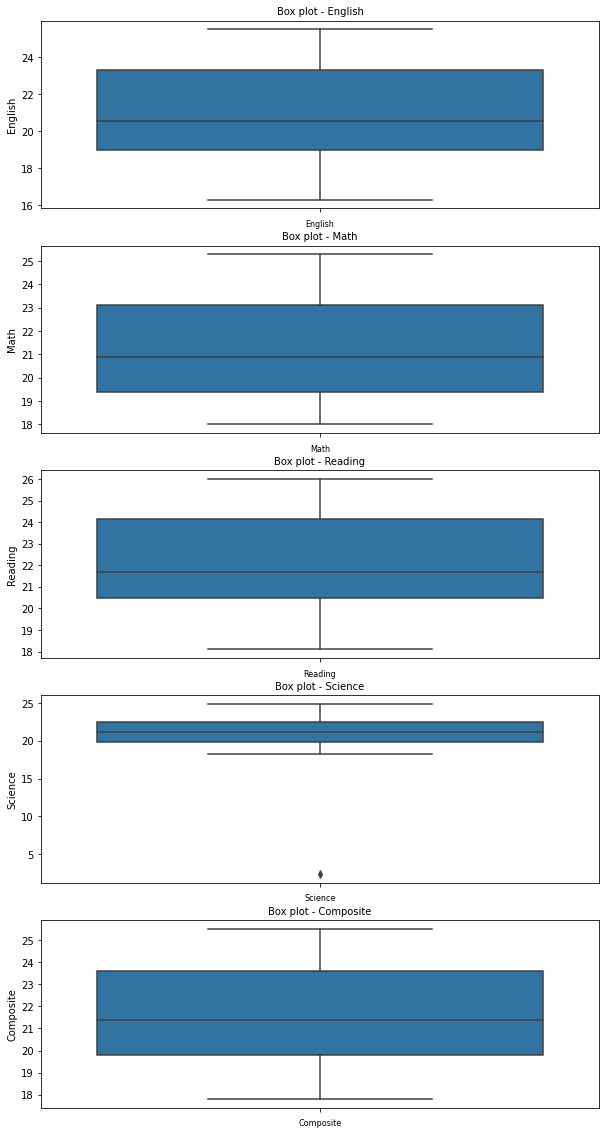

In [15]:
# Checking for Outliers
#
col_names = ['English', 'Math', 'Reading', 'Science', 'Composite']

fig, ax = plt.subplots(len(col_names), figsize=(10,20))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=data1[col_val], ax=ax[i])
    ax[i].set_title('Box plot - ' + str(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

In [18]:
# Checking for Anomalies
#

def remove(data, col):
    col_upper = data[col].mean() + 3*data[col].std()
    col_lower = data[col].mean() - 3*data[col].std()
    df = data[(data[col]< col_upper) & (data[col]> col_lower)]
    return df 

# remove()

for c in col_names:

    newdf = remove(data1, c)
    
newdf

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [21]:
# Identifying the Missing Data
#

newdf.isnull().sum()

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

In [22]:
# Dealing with the Missing Data
#

newdf.duplicated().sum()

0

In [ ]:
# More data cleaning procedures
#



## 6. Exploratory Analysis

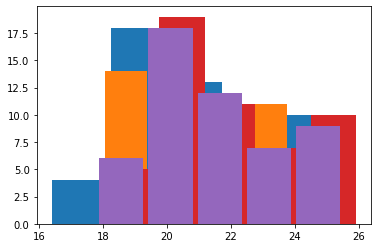

In [24]:
# Ploting the univariate summaries and recording our observations
#

def plot(data, col):
    fig = plt.hist(data[col], bins= 5, histtype='bar', rwidth=0.9)
    return fig

columnames = ['English', 'Math', 'Reading', 'Reading', 'Composite']
for i in columnames:
    plot(newdf, i)

English      20.919231
Math         21.173077
Reading      22.001923
Science      21.040385
Composite    21.509615
dtype: float64


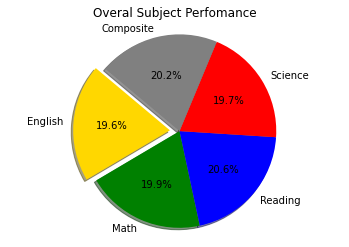

In [31]:
data_mean = newdf[['English', 'Math', 'Reading', 'Science', 'Composite']].mean()
print(data_mean)
labels = ['English', 'Math', 'Reading', 'Science', 'Composite']
explode = (0.1, 0, 0, 0, 0)  
color = ['gold', 'green', 'blue', 'red', 'grey']

plt.pie(data_mean, explode=explode, labels = labels, colors=color, autopct = '%1.1f%%', shadow = True, startangle = 140)


plt.axis('equal')
plt.title('Overal Subject Perfomance')
plt.show()

## 7. Implementing the Solution

In [34]:
# Implementing the Solution
# 
#Which subject performed best during the 2017 ACT test?

data_mean = newdf[['English', 'Math', 'Reading', 'Science', 'Composite']].mean()
data_mean.sort_values(ascending= False)

Reading      22.001923
Composite    21.509615
Math         21.173077
Science      21.040385
English      20.919231
dtype: float64

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [ ]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?